In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import randint
import statsmodels.api as sm

In [2]:
def DealMissingData(X, dfX):
    ''' deal with missing data
        X: data, type(numpy array)
        dfX: same as X data, type(pandas array) '''
    
    print("----------- Start deal missing data -----------")
    TFarr = np.array(dfX.isna().any())
    for index, ele in enumerate(TFarr):
        if ele:
            if isinstance(X[0][index], str):
                # deal with string data
                imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            else:
                # deal with digital data
                imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            print(f"{index} column have missing data, fixed!")
        else:
            print(f"{index} column not have missing data")
            
    print("----------- End deal missing data! -----------")
    return X

In [3]:
def MakeOneHot(X, pos={}):
    ''' make one-hot  
        X: data, type(numpy array)
        pos: where need to onehot, type(dictionary) '''
    
    print("----------- Start onehot -----------")
    FeaturesNum = len(X[0])    # init
    if bool(pos):
        # custom onehot (onehot pos that u want to)
        for key in pos:
            print(f"{FeaturesNum-pos[key]} column need to one-hot, fixed!")
            ct = ColumnTransformer([(key, OneHotEncoder(), [FeaturesNum-pos[key]])], remainder='passthrough')
            NewX = ct.fit_transform(X)
            X = NewX[:, 1:]
            FeaturesNum = len(X[0])
    else:
        # auto onehot (only onehot string cols)
        i = 0
        while i < FeaturesNum:
            if isinstance(X[0][i], str) or i==3:
                print(f"{i} column need to one-hot, fixed!")
                ct = ColumnTransformer([(str(i), OneHotEncoder(), [i])], remainder='passthrough')
                NewX = ct.fit_transform(X)[:, 1:]
                i += len(NewX[0]) - len(X[0])
                X = NewX
                FeaturesNum = len(X[0])
            i += 1
    print("----------- End onehot -----------")
    return X


In [4]:
def NormalizeData(data_train, data_test):
    ''' normalize data
        data_train: training data, type(numpy array)
        data_test: testing data, type(numpy array) '''
    
    print("----------- Start normalize -----------")
    sc = StandardScaler()
    data_train = sc_X.fit_transform(data_train)
    data_test = sc_X.transform(data_test)
    
    print("----------- End normalize -----------")
    return data_train, data_test

In [5]:
def DrawRelationship(X, y, label_x, label_y , ispred=False, pred=None):
    for key in label_x:
        allarr = []
        for i in range(len(X)):
            allarr.append(X[i][label_x[key]])
        
        if ispred:
            plt.scatter(allarr, pred, c="blue")
        plt.scatter(allarr, y, c="red")
        plt.xlabel(key)
        plt.ylabel(label_y)
        plt.show() 

In [6]:
def DrawPredict(gt, pred, title):
    ''' data [[groundTruth, predict], [], ....]'''
    
    data = []
    for i in range(len(gt)):
        data.append([gt[i], pred[i]])
        
    data.sort(key=lambda x:x[0])
    for index, ele in enumerate(data):
        plt.scatter(index, data[index][1], c="blue", s=0.7, label="GroundTruth")
        plt.scatter(index, data[index][0], c="red", s=0.7, label="PredictResult")
    plt.xlabel("dataNums")
    plt.ylabel("charges")
    plt.title(title)
    plt.show() 

In [7]:
def TrainAndTestModel(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    DrawPredict(y_train, train_pred, title+"_Train" + "\n" + f"RMSE: {train_rmse}, ACC: {train_acc}")
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    DrawPredict(y_test, test_pred, title+"_Test" + "\n" + f"RMSE: {test_rmse}, ACC: {test_acc}")
    return model

<h1>Data preprocessing</h1>

In [8]:
df = pd.read_csv("./DATA/final_project_dataset_1.csv")

dfX = df.iloc[:, :-1]
X = dfX.values
y = df.iloc[:, -1].values

#DrawRelationship(X, y, label_x={'age': 0, 'sex': 1, 'bmi': 2, 'children': 3, 'smoker': 4, 'region': 5}, label_y='charges')
print("Missing Data table:")
print(dfX.isna().any())
X = DealMissingData(X, dfX)

#pos2onehot = {'Sex': 5, 'children': 3, 'Smoker': 2, 'Region': 1}
X = MakeOneHot(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train, X_test = NormalizeData(X_train, X_test)
print(X[0])
print("Preprocessing data done!")
print(X[:5])

Missing Data table:
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
dtype: bool
----------- Start deal missing data -----------
0 column not have missing data
1 column not have missing data
2 column not have missing data
3 column not have missing data
4 column not have missing data
5 column not have missing data
----------- End deal missing data! -----------
----------- Start onehot -----------
1 column need to one-hot, fixed!
3 column need to one-hot, fixed!
8 column need to one-hot, fixed!
9 column need to one-hot, fixed!
----------- End onehot -----------
[0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 19 27.9]
Preprocessing data done!
[[0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 19 27.9]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 18 33.77]
 [0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 28 33.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 33 22.705]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 32 28.88]]


<h1>LinearRegressor</h1>

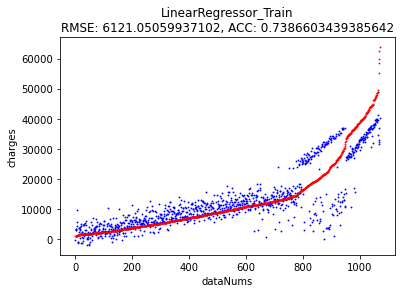

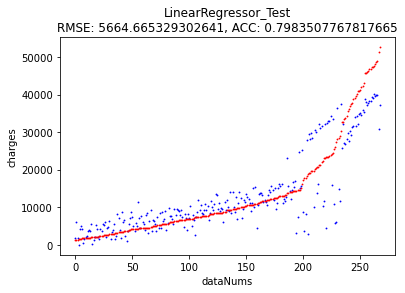

LinearRegression()

In [9]:
TrainAndTestModel(LinearRegression(), X_train, y_train, X_test, y_test, "LinearRegressor")

<h1>OLS</h1>

In [10]:
# append 1 std
X_train_std = np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)
print(X_train_std[:5])

[[1 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 37 34.1]
 [1 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 18 34.43]
 [1 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 23 36.67]
 [1 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 32 35.2]
 [1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 58 32.395]]


In [11]:
# try to optimize model
X_opt = X_train_std[:, [0, 4, 6, 8, 11, 12]]
X_opt = np.array(X_opt, dtype=float)
# sm.OLS()
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     597.3
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          7.88e-306
Time:                        20:59:06   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1064   BIC:                         2.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.173e+04   1051.856    -11.153      0.000   -1.38e+04   -9667.129
x1          2.357e+04    467.529     50.416      0.000    2.27e+04    2.45e+04
x2          1471.2160    493.112      2.984      0.003     503.633    2438.799
x3          2953.8260   1427.979      2.069      0.039     151.851    5755.801
x4           256.1202     13.466     19.020      0.000     229.698     282.542
x5           318.3000     30.639     10.389      0.000     258.180     378.420
==============================================================================
Omnibus:                      251.564   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.907
Skew:                           1.259   Prob(JB):                    8.89e-131
Kurtosis:                       5.664   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X_train_opt = X_train[:, [3, 5, 7, 10, 11]]    # select opt's columns
X_test_opt = X_test[:, [3, 5, 7, 10, 11]]   # select opt's columns correspond train

<h1>Linear opt</h1>

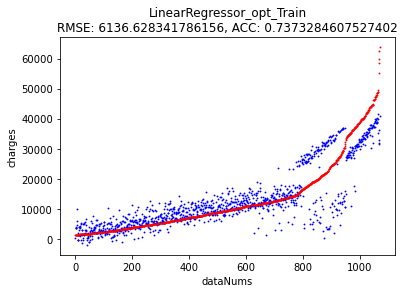

KeyboardInterrupt: 

In [13]:
TrainAndTestModel(LinearRegression(), X_train_opt, y_train, X_test_opt, y_test, "LinearRegressor_opt")

<h1>SVR</h1>

In [ ]:
TrainAndTestModel(SVR(kernel="linear"), X_train, y_train, X_test, y_test, "SVR")

<h1>DecisionTreeRegressor</h1>

In [ ]:
TrainAndTestModel(DecisionTreeRegressor(), X_train, y_train, X_test, y_test, "DecisionTreeRegressor")

<h1>LassoCV</h1>

In [ ]:
TrainAndTestModel(LassoCV(), X_train, y_train, X_test, y_test, "LassoCV")

<h1>RidgeCV</h1>

In [ ]:
TrainAndTestModel(RidgeCV(), X_train, y_train, X_test, y_test, "RidgeCV")

<h1>ElasticNetCV</h1>

In [ ]:
TrainAndTestModel(ElasticNetCV(), X_train, y_train, X_test, y_test, "ElasticNetCV")

<h1>RandomForestRegressor</h1>

In [ ]:
TrainAndTestModel(RandomForestRegressor(), X_train, y_train, X_test, y_test, "RandomForestRegressor")

<h1>RandomForestRegressor OPT</h1>

In [ ]:
TrainAndTestModel(RandomForestRegressor(), X_train_opt, y_train, X_test_opt, y_test, "RandomForestRegressor_opt")

<h1>Grid Search</h1>

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 40],'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5, 6]},
]
print(type(param_grid))

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.get_params()

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
final_model.score(X_test, y_test)

<h1>Random search<\h1>

In [ ]:
param_distribs = {
    'n_estimators': randint(low=1, high=300),
    'max_features': randint(low=1, high=12),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

In [ ]:
rnd_search.best_params_

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
rnd_search_model = rnd_search.best_estimator_
rnd_search_predictions = rnd_search_model.predict(X_test)

rnd_search_mse = mean_squared_error(y_test, rnd_search_predictions)
rnd_search_rmse = np.sqrt(rnd_search_mse)

In [ ]:
rnd_search_model.score(X_test, y_test)

In [ ]:
DrawPredict(y_train, rnd_search_model.predict(X_train), "RandomSearch(RFR)_Train")
DrawPredict(y_test, rnd_search_predictions, "RandomSearch(RFR)_Test")